In [49]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv("Ecoli.csv")

In [51]:
df.head()

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,...,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,...,0.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879,-0.008032,0.136446,0.058237,-0.669180,-0.178595,...,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,0
3,-0.575372,0.072558,-0.338325,1.904284,0.005116,0.008196,-0.327621,-0.473782,-1.542346,-0.393830,...,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,-0.803559,0.091011,0.102247,-0.409790,-0.102239,0.009500,-0.106781,-0.039143,-1.026445,-0.374050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [52]:
df.describe()

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,...,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
count,1380.000000,1385.000000,1371.000000,1384.000000,1380.000000,1398.000000,1374.000000,1405.000000,1402.000000,1393.000000,...,1338.000000,1371.000000,1351.000000,1361.000000,1364.000000,1335.000000,1362.000000,1351.000000,1378.000000,1500.000000
mean,0.301126,-0.079438,0.030678,0.177888,0.063858,0.005272,0.012457,0.023772,-0.047162,-0.103631,...,0.294469,0.253100,0.173205,0.192506,0.065249,0.131086,0.746696,0.749075,0.014514,0.107333
std,5.224555,4.226729,4.973282,4.357570,2.055092,0.159378,1.369858,1.934108,2.504858,2.334090,...,0.455974,0.434946,0.378565,0.394413,0.247056,0.337621,0.435063,0.433706,0.119639,0.309640
min,-12.087693,-99.742146,-99.479143,-5.729163,-1.909283,-2.595584,-26.858132,-48.259947,-68.531682,-74.662890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.634335,-0.695010,-0.441752,-0.608425,-0.274807,-0.014044,-0.237183,-0.181403,-0.508379,-0.333713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.022312,-0.071031,-0.005366,0.013526,0.006423,0.000257,0.026227,0.009421,0.023022,-0.019188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.677605,0.580978,0.425678,0.572284,0.299530,0.014486,0.265871,0.184693,0.515828,0.332000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,105.371433,85.775483,128.358411,128.577337,74.030239,4.490950,26.310561,35.020638,42.830877,1.900067,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 117 entries, (Num) Column 1  to Target (Column 117)
dtypes: float64(116), int64(1)
memory usage: 1.3 MB
None


In [54]:
df.columns

Index(['(Num) Column 1 ', '(Num) Column 2', '(Num) Column 3', '(Num) Column 4',
       '(Num) Column 5', '(Num) Column 6', '(Num) Column 7', '(Num) Column 8',
       '(Num) Column 9', '(Num) Column 10',
       ...
       '(Nom) Column 108', '(Nom) Column 109', '(Nom) Column 110',
       '(Nom) Column 111', '(Nom) Column 112', '(Nom) Column 113',
       '(Nom) Column 114', '(Nom) Column 115', '(Nom) Column 116',
       'Target (Column 117)'],
      dtype='object', length=117)

In [55]:
df['Target (Column 117)'].value_counts()

0    1339
1     161
Name: Target (Column 117), dtype: int64

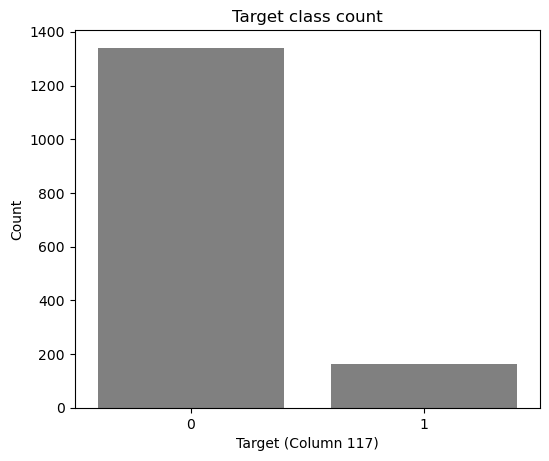

In [56]:
plt.figure(figsize=(6,5), dpi=100)
sns.countplot(data=df, x = 'Target (Column 117)', color= "grey")
plt.ylabel('Count')
plt.title('Target class count')
plt.show();

In [57]:
df.isnull().sum()

(Num) Column 1         120
(Num) Column 2         115
(Num) Column 3         129
(Num) Column 4         116
(Num) Column 5         120
                      ... 
(Nom) Column 113       165
(Nom) Column 114       138
(Nom) Column 115       149
(Nom) Column 116       122
Target (Column 117)      0
Length: 117, dtype: int64

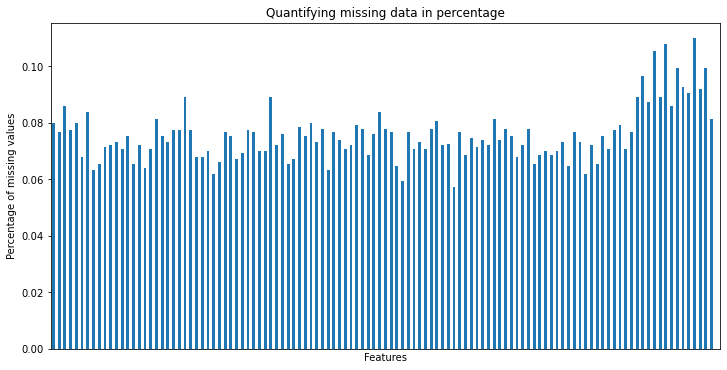

In [58]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Quantifying missing data in percentage')
plt.xticks([])
plt.show();

In [59]:
df.columns

Index(['(Num) Column 1 ', '(Num) Column 2', '(Num) Column 3', '(Num) Column 4',
       '(Num) Column 5', '(Num) Column 6', '(Num) Column 7', '(Num) Column 8',
       '(Num) Column 9', '(Num) Column 10',
       ...
       '(Nom) Column 108', '(Nom) Column 109', '(Nom) Column 110',
       '(Nom) Column 111', '(Nom) Column 112', '(Nom) Column 113',
       '(Nom) Column 114', '(Nom) Column 115', '(Nom) Column 116',
       'Target (Column 117)'],
      dtype='object', length=117)

In [60]:
df.shape

(1500, 117)

In [61]:
df['Target (Column 117)'].unique()

array([0, 1], dtype=int64)

In [62]:
# Strip Leading and Trailing Space of the column
df.columns = df.columns.str.strip()
df.columns

Index(['(Num) Column 1', '(Num) Column 2', '(Num) Column 3', '(Num) Column 4',
       '(Num) Column 5', '(Num) Column 6', '(Num) Column 7', '(Num) Column 8',
       '(Num) Column 9', '(Num) Column 10',
       ...
       '(Nom) Column 108', '(Nom) Column 109', '(Nom) Column 110',
       '(Nom) Column 111', '(Nom) Column 112', '(Nom) Column 113',
       '(Nom) Column 114', '(Nom) Column 115', '(Nom) Column 116',
       'Target (Column 117)'],
      dtype='object', length=117)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 117 entries, (Num) Column 1 to Target (Column 117)
dtypes: float64(116), int64(1)
memory usage: 1.3 MB


In [64]:
mask = (df['Target (Column 117)']==0)
mode = df[df['Target (Column 117)']==0].iloc[:,103:-1].mode().iloc[0]
df = df.mask(mask, df.fillna(mode))

In [65]:
mask = (df['Target (Column 117)']==1)
mode = df[df['Target (Column 117)']==1].iloc[:,103:-1].mode().iloc[0]
df = df.mask(mask, df.fillna(mode))

In [66]:
mask = (df['Target (Column 117)']==0)
median = df[df['Target (Column 117)']==0].iloc[:,0:103].median()
df = df.mask(mask, df.fillna(median))

In [67]:
mask = (df['Target (Column 117)']==1)
median = df[df['Target (Column 117)']==1].iloc[:,0:103].median()
df = df.mask(mask, df.fillna(median))

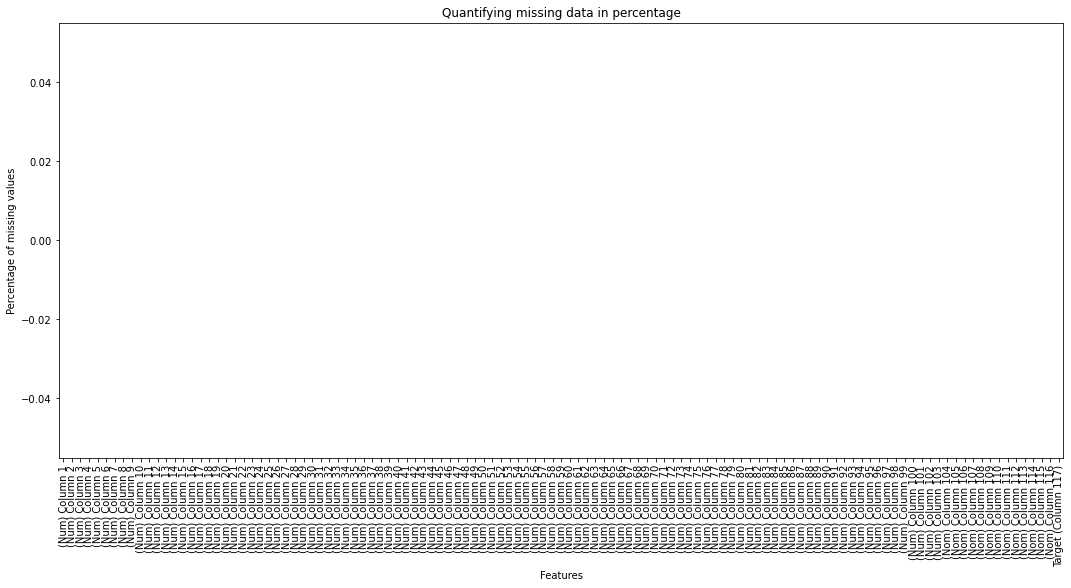

In [68]:
df.isnull().mean().plot.bar(figsize=(18,8))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Quantifying missing data in percentage')

plt.show();

In [69]:
for i in df.columns:
    if i[:5] == "(Nom)":
        df[i] = df[i].astype('int')

In [70]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [71]:
X.shape

(1500, 116)

In [72]:
len(y)

1500

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 117 entries, (Num) Column 1 to Target (Column 117)
dtypes: float64(103), int32(13), int64(1)
memory usage: 1.3 MB


In [74]:
df.shape

(1500, 117)

In [75]:
lof = LocalOutlierFactor()

In [76]:
outliers = lof.fit_predict(X) # Predict the labels (1 inlier, -1 outlier) of X according to LOF.

In [77]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  47, 1453], dtype=int64))

In [78]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
outliers.shape

(1500,)

In [80]:
outlier_lof_index = []
for i, k in enumerate(outliers):
    if k == -1:
        outlier_lof_index.append(i)

In [81]:
len(outlier_lof_index)

47

In [82]:
df.head()

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,...,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,...,0,0,0,0,0,0,0,0,0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,...,0,0,1,1,0,0,1,1,0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879,-0.008032,0.136446,0.058237,-0.669180,-0.178595,...,0,0,0,0,0,0,1,1,0,0
3,-0.575372,0.072558,-0.338325,1.904284,0.005116,0.008196,-0.327621,-0.473782,-1.542346,-0.393830,...,0,0,0,0,0,0,1,1,1,0
4,-0.803559,0.091011,0.102247,-0.409790,-0.102239,0.009500,-0.106781,-0.039143,-1.026445,-0.374050,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_lof = df.drop(outlier_lof_index)

In [84]:
df_lof.shape

(1453, 117)

In [85]:
X = df_lof.iloc[:, 0:-1].reset_index()
y = df_lof.iloc[:,-1].reset_index().drop('index', axis=1)['Target (Column 117)']

In [86]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

0    1294
1    1294
Name: Target (Column 117), dtype: int64

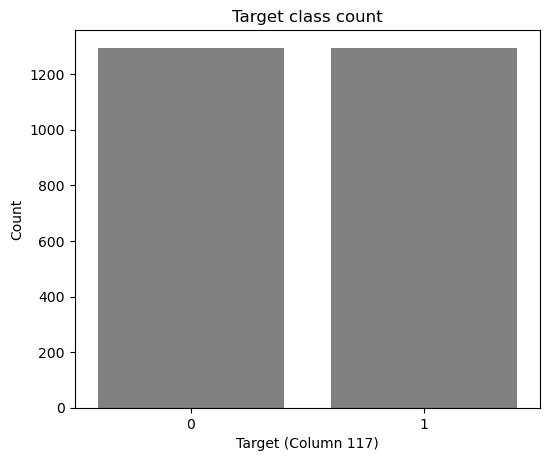

In [87]:
plt.figure(figsize=(6,5), dpi=100)
sns.countplot(x = y, color= "grey")
plt.ylabel('Count')
plt.title('Target class count')
plt.show();

In [88]:
scaler = StandardScaler()

## 1) DT

In [89]:
param_dict = {"criterion": ["gini", "entropy"], 
              "max_depth": list(range(2, 15)), 
              "min_samples_leaf":  list(range(1, 15))}

In [90]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='f1', verbose=1)

In [91]:
#checking the selected permutation of parameters
model.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 9}

In [92]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9347258485639687

In [93]:
model.best_score_

0.9451706545986319

## 2) RF

In [94]:
param_dict = {"criterion": ["entropy"], 
              "max_depth": [3, 5, 14],
              "min_samples_leaf":  [5, 6, 9, 12], 
              "n_estimators" : [125], 
              "max_features": [40, 50, 55, 60, 70]}

In [95]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
rf = RandomForestClassifier(random_state=42)
model = GridSearchCV(rf, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 14],
                         'max_features': [40, 50, 55, 60, 70],
                         'min_samples_leaf': [5, 6, 9, 12],
                         'n_estimators': [125]},
             scoring='f1', verbose=1)

In [96]:
#checking the selected permutation of parameters
model.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 55,
 'min_samples_leaf': 6,
 'n_estimators': 125}

In [97]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9673202614379086

In [98]:
model.best_score_

0.968265390329463

## 3) K-NN

In [99]:
param_dict = {"n_neighbors": list(range(1,30)), 
              "weights": ["uniform", "distance"],
              "metric": ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

In [100]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
knn = KNeighborsClassifier()
model = GridSearchCV(knn, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 232 candidates, totalling 1160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [101]:
#checking the selected permutation of parameters
model.best_params_

{'metric': 'chebyshev', 'n_neighbors': 2, 'weights': 'uniform'}

In [102]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.7838383838383839

In [103]:
model.best_score_

0.7784468789592306

## 4) Naïve Bayes classifier

In [104]:
param_dict = {'var_smoothing': np.logspace(0,-9, num=100)}

In [105]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
nb = GaussianNB()
model = GridSearchCV(nb, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [106]:
#checking the selected permutation of parameters
model.best_params_

{'var_smoothing': 0.01873817422860384}

In [107]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9505208333333333

In [108]:
model.best_score_

0.9394225600545181

## PCA

In [109]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pca = PCA()

In [110]:
list(range(30,81,5))

[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [111]:
param_dict = {"pca__n_components":list(range(30,81,5))}

In [112]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
rf = RandomForestClassifier(criterion= 'gini', max_depth = 5, max_features = 40, min_samples_leaf = 3, n_estimators = 125, random_state = 42)
pipe = Pipeline(steps=[('pca', pca), ('forest', rf)])
model = GridSearchCV(pipe, param_dict, cv = 5, verbose=0, scoring='f1')
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('forest',
                                        RandomForestClassifier(max_depth=5,
                                                               max_features=40,
                                                               min_samples_leaf=3,
                                                               n_estimators=125,
                                                               random_state=42))]),
             param_grid={'pca__n_components': [30, 35, 40, 45, 50, 55, 60, 65,
                                               70, 75, 80]},
             scoring='f1')

In [113]:
#checking the selected permutation of parameters
model.best_params_

{'pca__n_components': 80}

In [114]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.8585247883917774

In [115]:
model.best_score_

0.8535847242847396

## XGBoost

In [116]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
param_dict = {
    'max_depth': range (2, 6, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [118]:
for i in X.columns:
    if i[:5] == "(Nom)":
        X[i] = X[i].astype('int')

In [119]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
estimator = XGBClassifier(eval_metric='mlogloss')
model = GridSearchCV(estimator, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample

In [120]:
#checking the selected permutation of parameters
model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 140}

In [121]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9806451612903226

In [122]:
model.best_score_

0.9762246043842808

## Logistic Regression


In [123]:
param_dict = {"C" : np.logspace(-4, 4, 20), "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [124]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
estimator = LogisticRegression()
model = GridSearchCV(estimator, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [125]:
#checking the selected permutation of parameters
model.best_params_

{'C': 0.615848211066026, 'penalty': 'l2'}

In [126]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9434447300771208

In [127]:
model.best_score_

0.9400175660650085

## SVM

In [128]:
param_dict = {'C': list(range(100, 1001, 25)),
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

In [129]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#Standardization
X_train.iloc[:,0:103] = scaler.fit_transform(X_train.iloc[:,0:103])
X_test.iloc[:,0:103] = scaler.transform(X_test.iloc[:,0:103])
#model
estimator = SVC()
model = GridSearchCV(estimator, param_dict, cv = 5, verbose=1, scoring='f1')
model.fit(X_train,y_train)

Fitting 5 folds for each of 370 candidates, totalling 1850 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
                               350, 375, 400, 425, 450, 475, 500, 525, 550, 575,
                               600, 625, 650, 675, 700, 725, 750, 775, 800, 825, ...],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             scoring='f1', verbose=1)

In [130]:
#checking the selected permutation of parameters
model.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [131]:
#checking how well the model does on the holdout-set
model.score(X_test,y_test)

0.9935483870967742

In [132]:
model.best_score_

0.9856290854633396